# SmartBeds - Análisis de componentes principales

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador
*Linea de investigación deshechada*

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk
import gc #Garbage colector

### Lectura de datos

In [2]:
with open('data/datosF.pdd','rb') as f:
    datos = pk.load(f)
    
with open('data/datosEF.pdd','rb') as f:
    dataE = pk.load(f)

### Componentes principales

In [3]:
from sklearn.decomposition import PCA
from loadData import normalize

#### Datos Brutos

In [4]:
data = datos.iloc[:,1:len(datos.columns)-1]
data.head()

,P1,P2,P3,P4,P5,P6
4041041,0.0,27.835052,30.208333,22.772277,0.0,0.0
4041042,0.0,26.804124,29.166667,21.782178,0.0,0.0
4041043,0.0,25.773196,28.125000,21.782178,0.0,0.0
4041044,0.0,26.804124,29.166667,22.772277,0.0,0.0
4041045,0.0,26.804124,30.208333,22.772277,0.0,0.0


In [5]:
pcaB = PCA(n_components=2).fit_transform(data)

Text(0.5, 1.0, 'PCA Raw')

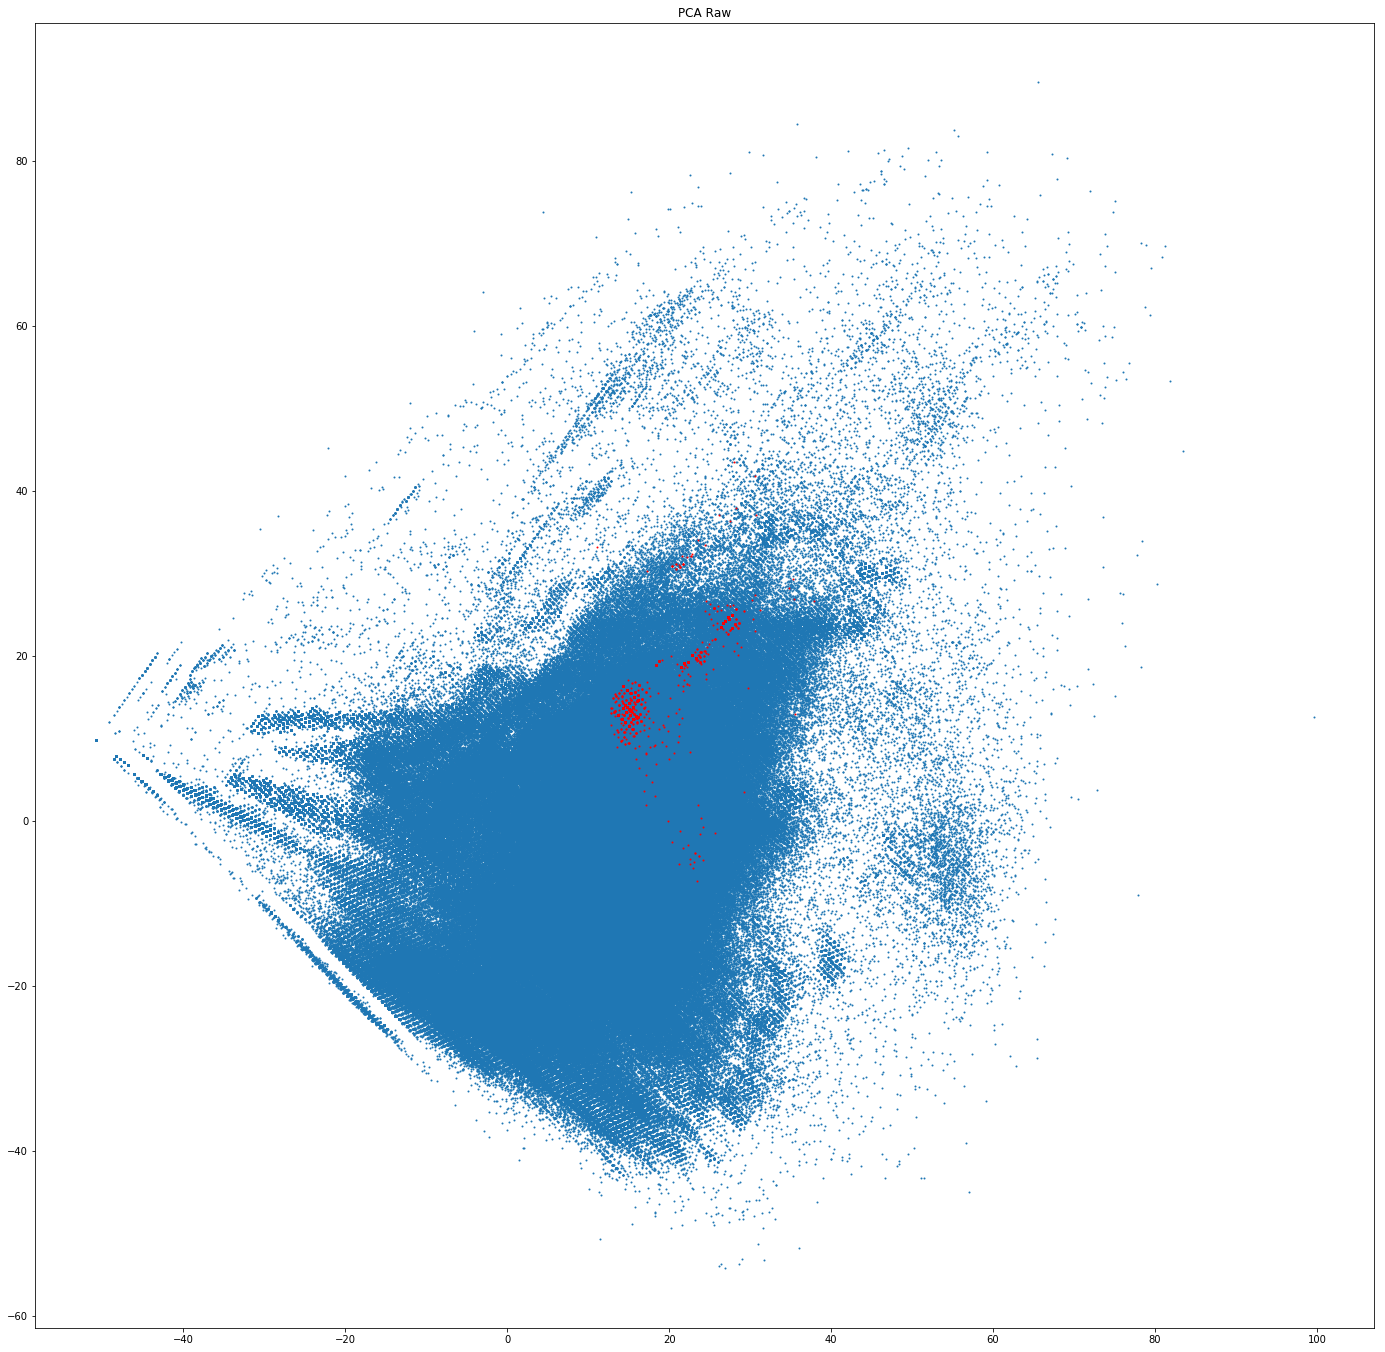

In [6]:
plt.figure(figsize=(24,24))
pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('PCA Raw')

#### Datos Estadísticos Móviles

In [9]:
datosE = dataE
datosE = datosE.iloc[:,len(datos.columns):]
medias = datosE.iloc[:,0:int(len(datosE.columns)/2)]
desv = datosE.iloc[:,int(len(datosE.columns)/2):]

desv = normalize(desv)*100
datosE = pd.concat((medias,desv),axis=1)
datosE.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
4041089,0.0,23.369697,28.370908,22.322715,0.0,0.0,0.0,1.477078,1.101089,0.913333,0.0,0.0
4041090,0.0,23.319364,28.331752,22.290648,0.0,0.0,0.0,1.293217,1.030609,0.826437,0.0,0.0
4041091,0.0,23.275809,28.295521,22.261637,0.0,0.0,0.0,1.120388,0.961554,0.742723,0.0,0.0
4041092,0.0,23.238762,28.262239,22.235658,0.0,0.0,0.0,0.959422,0.893656,0.662807,0.0,0.0
4041093,0.0,23.207931,28.231920,22.212655,0.0,0.0,0.0,0.811285,0.826609,0.587098,0.0,0.0


In [10]:
pcaM = PCA(n_components=2).fit_transform(medias)
pcaD = PCA(n_components=2).fit_transform(desv)
pcaMD = PCA(n_components=2).fit_transform(datosE)

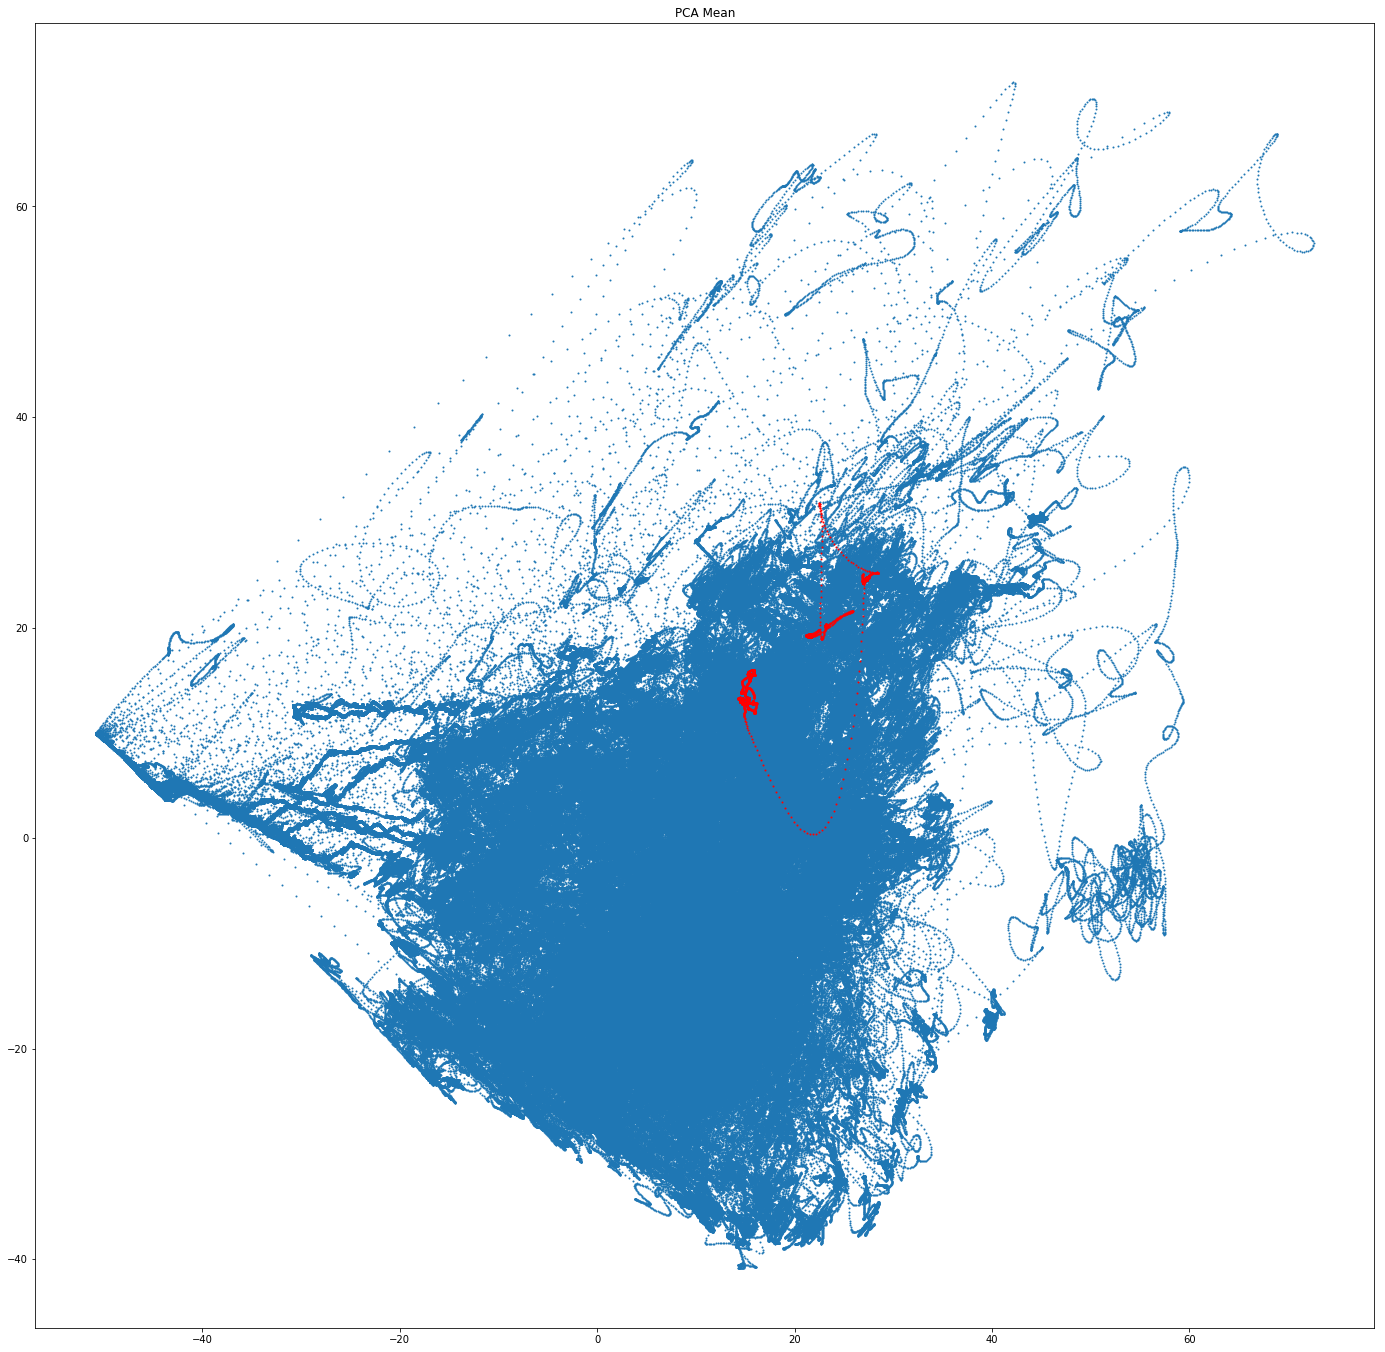

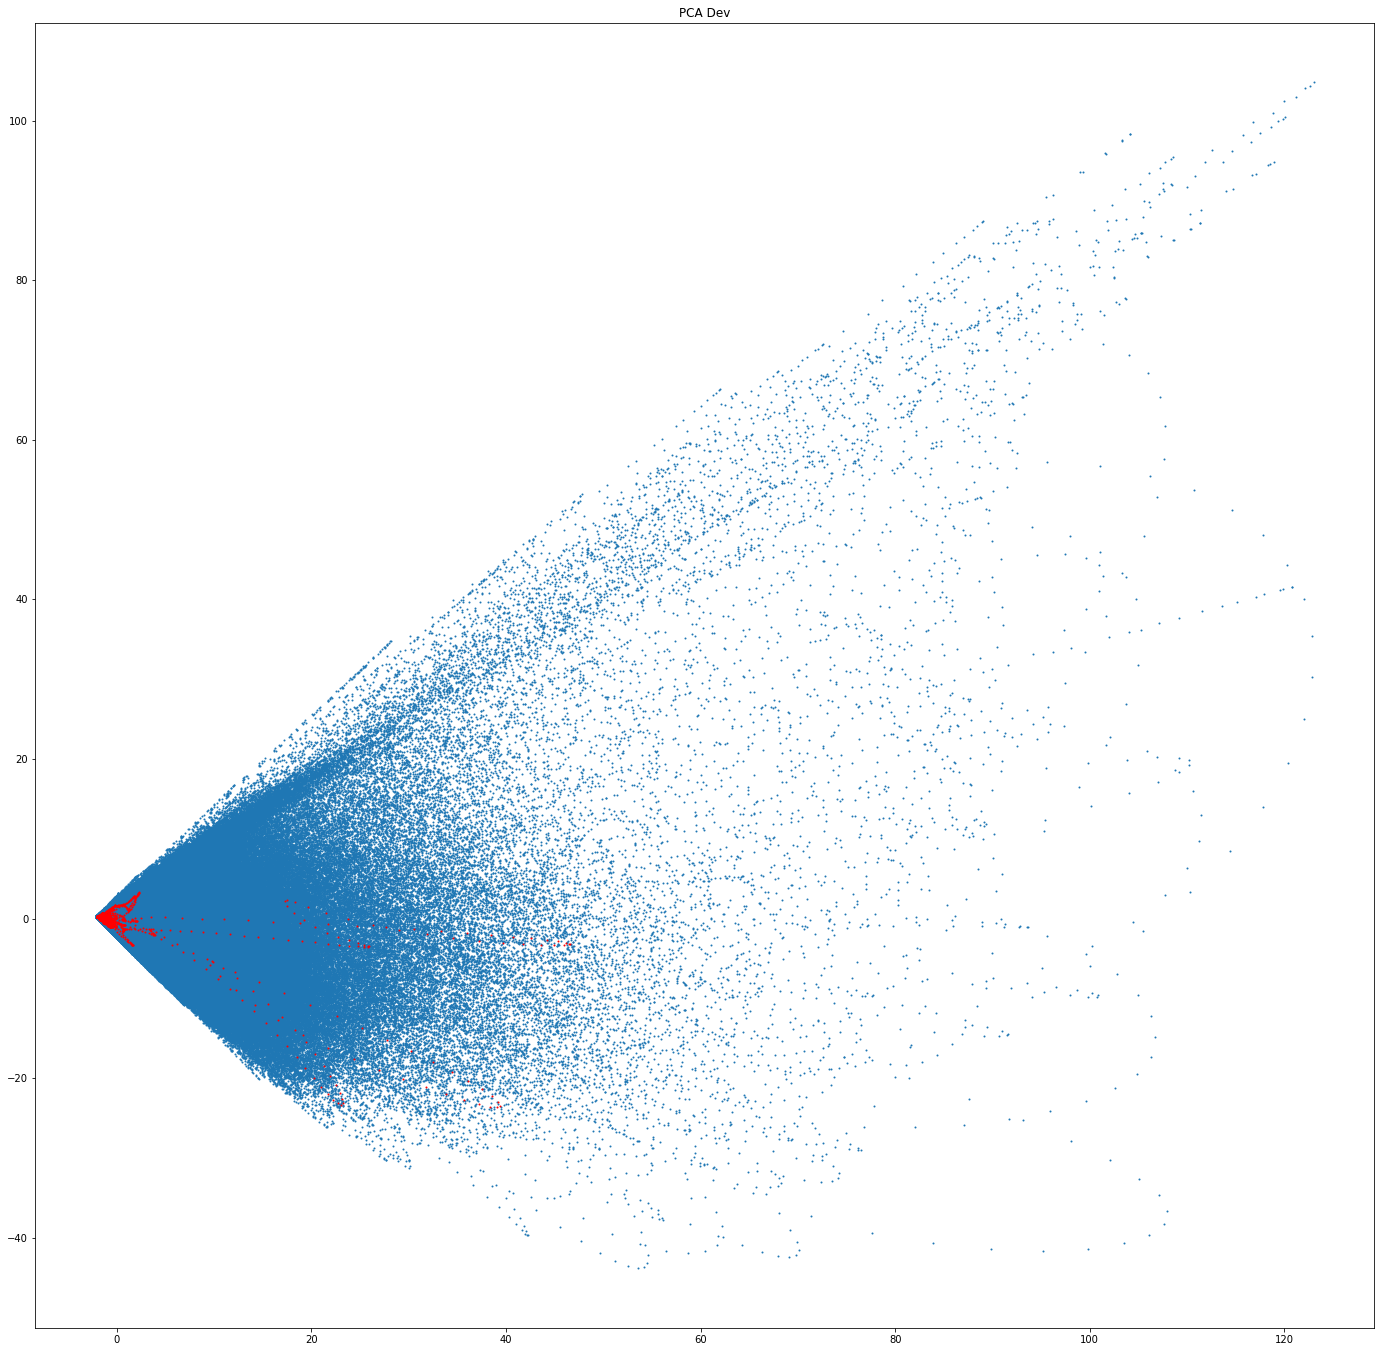

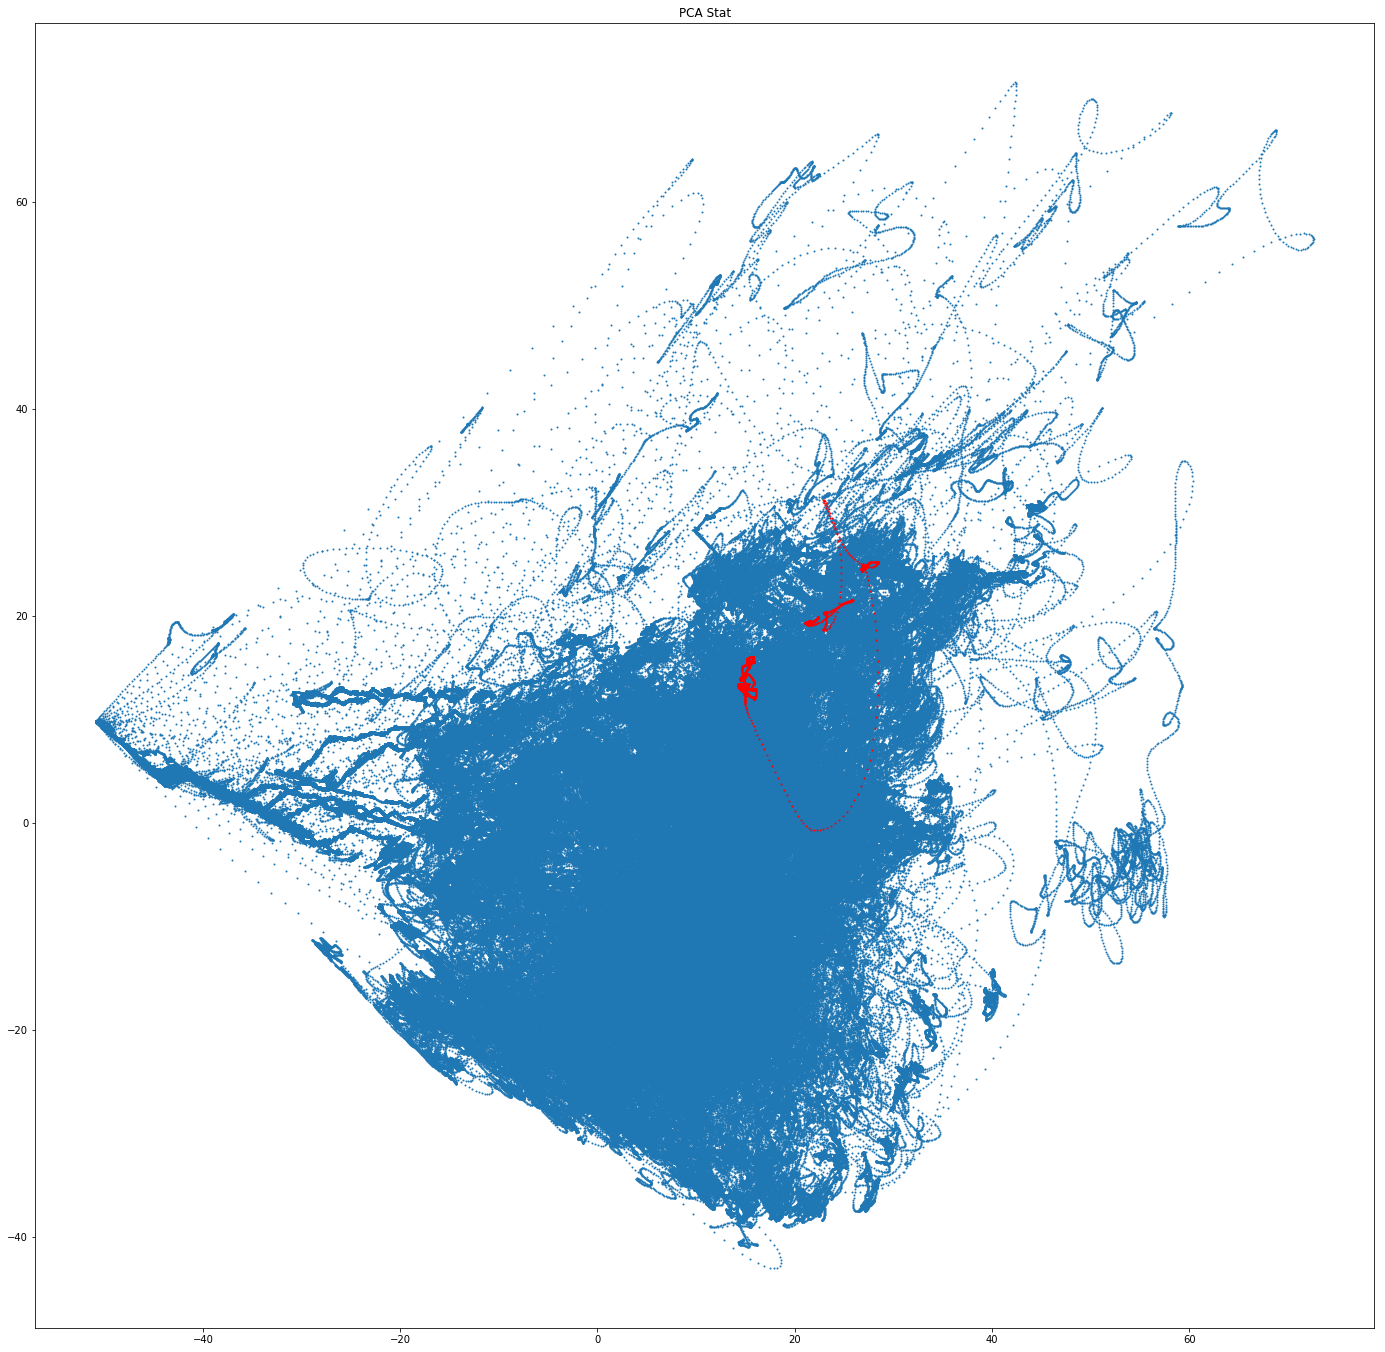

In [12]:
target = dataE.dropna()['target'].values
notTarget = np.logical_not(target)

sct = [pcaM,pcaD,pcaMD]
tit = ['Mean','Dev','Stat']
for i in range(len(sct)):
    pcaSample = sct[i]#sct[i][np.random.choice(sct[i].shape[0], int(4e4), replace=False), :]
    serie = pd.DataFrame(pcaSample)

    X = pd.Series(serie[0]).loc[notTarget]
    Y = pd.Series(serie[1]).loc[notTarget]

    X_t = pd.Series(serie[0]).loc[target]
    Y_t = pd.Series(serie[1]).loc[target]
    
    plt.figure(figsize=(24,24))
    
    plt.scatter(X,Y,s=1)
    plt.scatter(X_t,Y_t,s=1,c='r')
    plt.title('PCA '+tit[i])

#### Tridimencional

In [11]:
data = datos.iloc[:,1:len(datos.columns)-1]
pcaB = PCA(n_components=3).fit_transform(data)

Text(0.5, 0.92, 'PCA Raw')

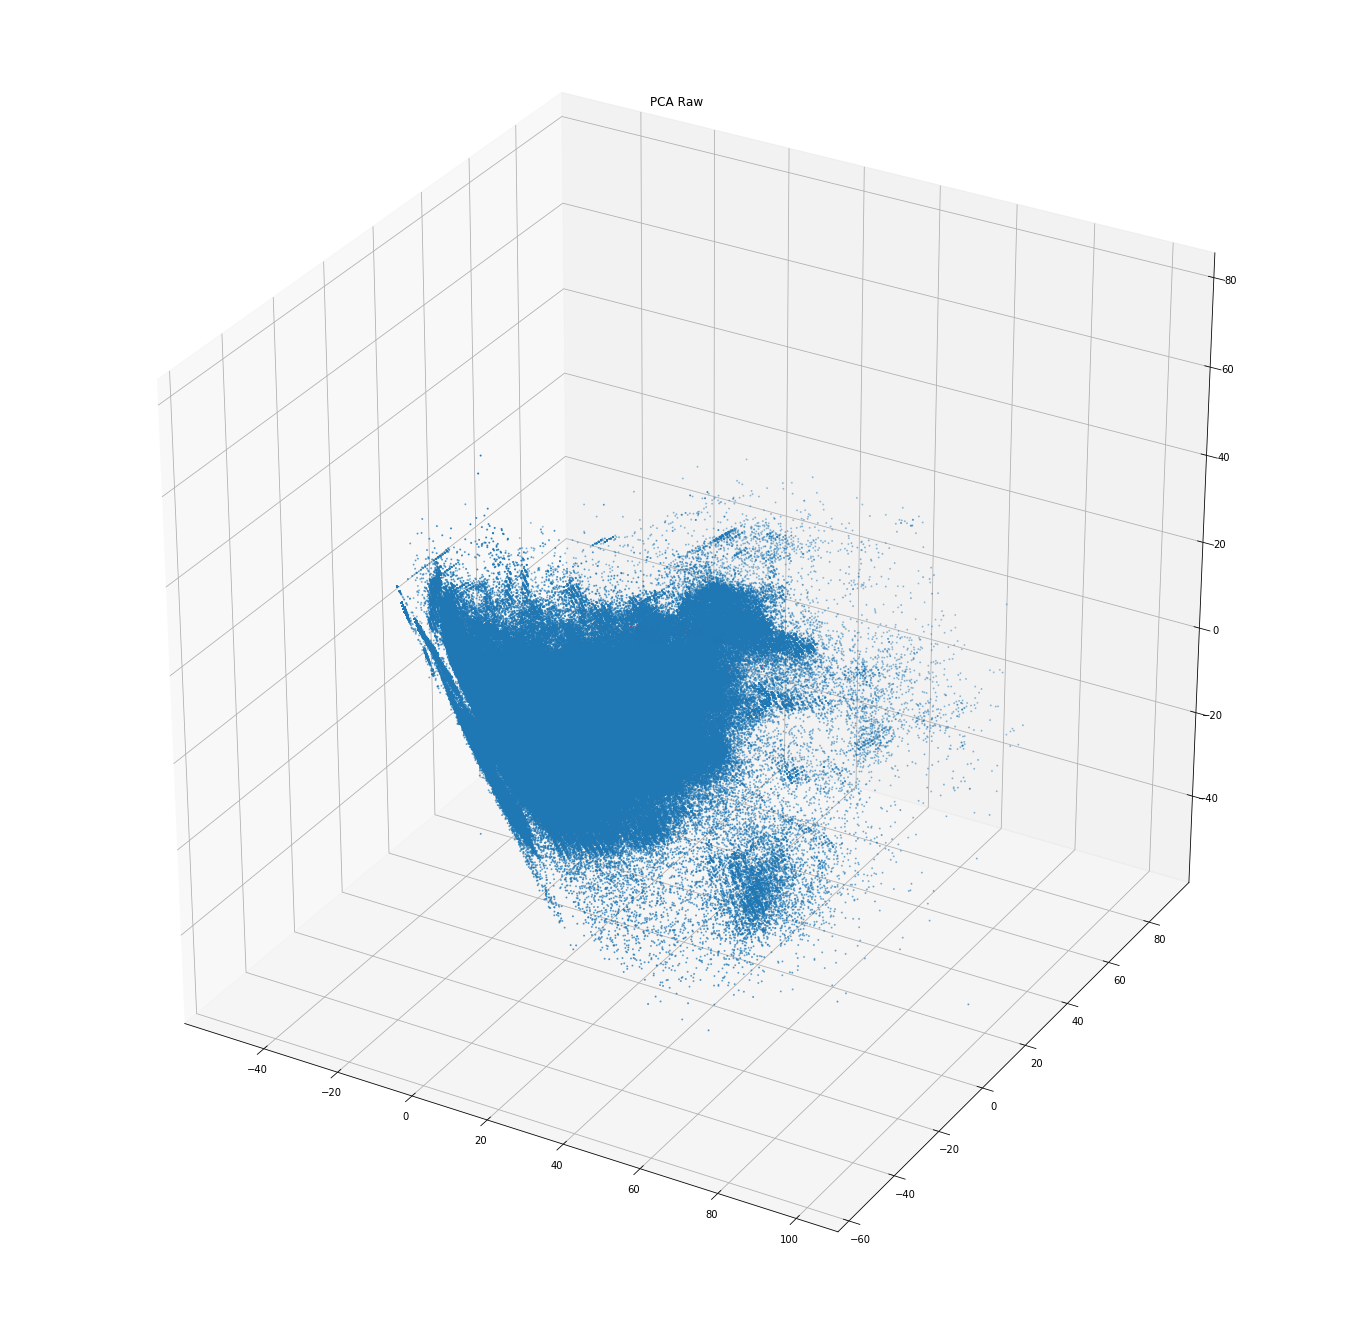

In [12]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, projection='3d')

pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]
Z = pd.Series(serie[2]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]
Z_t = pd.Series(serie[2]).loc[target]

ax.scatter(X,Y,Z,s=1)
ax.scatter(X_t,Y_t,Z_t,s=1,c='r')
plt.title('PCA Raw')